In [1]:
import pickle as pck
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
# import pylandau as pland
# import ROOT
import sys
import scipy.ndimage as ndimage
import numpy.ma as ma

def gaussian(x, a, mean, sigma):
    return a * np.exp(-((x - mean)**2 / (2 * sigma**2)))
    
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import A4, letter
from reportlab.lib.utils import ImageReader

In [2]:
plt.rcParams.update({
    "image.origin": "lower",
    "image.aspect": 1,
    #"text.usetex": True,
    "grid.alpha": .5,
    "axes.linewidth":2,
    "lines.linewidth" : 1,
    "font.size":    15.0,
    "xaxis.labellocation": 'right',  # alignment of the xaxis label: {left, right, center}
    "yaxis.labellocation": 'top',  # alignment of the yaxis label: {bottom, top, center}
    "xtick.top":           True ,  # draw ticks on the top side
    "xtick.major.size":    8    ,# major tick size in points
    "xtick.minor.size":    4      ,# minor tick size in points
    "xtick.direction":     'in',
    "xtick.minor.visible": True,
    "ytick.right":           True ,  # draw ticks on the top side
    "ytick.major.size":    8    ,# major tick size in points
    "ytick.minor.size":    4      ,# minor tick size in points
    "ytick.direction":     'in',
    "ytick.minor.visible": True,
    "ytick.major.width":   2   , # major tick width in points
    "ytick.minor.width":   1 ,
    "xtick.major.width":   2   , # major tick width in points
    "xtick.minor.width":   1 ,
    "legend.framealpha": 0 ,
    "legend.loc": 'best',

})

In [9]:
# path = '/home/bruce/Documents/Programas/Catalogo_Eventos/dict__straight_muons_Extensions_1_to_4_Imgs_2078_Elip_0.8_ADUs__.pkl'
# path = '/home/bruce/Documents/Programas/Catalogo_Eventos/dict__straight_muons_Extensions_1_to_4_Imgs_2078_Elip_0.8_Sol_0.8_ADUs__.pkl'
# path = '/home/bruce/Documents/Programas/Catalogo_Eventos/dict__straight_muons_Extensions_1_to_4_Imgs_2078_Elip_0.7_Sol_0.85_ADUs__.pkl' ## Demasiados eventos redondos
# path = '/home/bruce/Documents/Programas/Catalogo_Eventos/dict__straight_muons_Extensions_1_to_4_Imgs_2078_Elip_0.85_Sol_0.7_ADUs__.pkl'
path = '/home/bruce/Documents/Programas/Catalogo_Eventos/dict__straight_muons_Extensions_1_to_4_Imgs_2078_Elip_0_Sol_0.7_ADUs__.pkl'


histogram = open(path, 'rb')
data_histogram = pck.load(histogram)
histogram.close()

In [10]:
print('Llaves principales del diccionario: ', data_histogram.keys())
print('Llaves secundarias por extensión: ', data_histogram['extension_1'].keys(), end='\n\n')


print('Muones rectos y verticales detectados en total: ',data_histogram['All_Muons_Detected'])

Llaves principales del diccionario:  dict_keys(['All_Muons_Detected', 'extension_1', 'extension_2', 'extension_4'])
Llaves secundarias por extensión:  dict_keys(['charge', 'Vertical_Events', 'Horizontal_Events'])

Muones rectos y verticales detectados en total:  577


In [11]:
matrix_ext_1_vertical = data_histogram['extension_1']['Vertical_Events']
matrix_ext_1_horizontal = data_histogram['extension_1']['Horizontal_Events']

matrix_ext_2_vertical = data_histogram['extension_2']['Vertical_Events']
matrix_ext_2_horizontal = data_histogram['extension_2']['Horizontal_Events']

matrix_ext_4_vertical = data_histogram['extension_4']['Vertical_Events']
matrix_ext_4_horizontal = data_histogram['extension_4']['Horizontal_Events']

print('Muones verticales en ext_1: ', len(matrix_ext_1_vertical))
print('Muones verticales en ext_2: ', len(matrix_ext_2_vertical))
print('Muones verticales en ext_4: ', len(matrix_ext_4_vertical))
print('Muones verticales totales detectados: ', len(matrix_ext_1_vertical) + len(matrix_ext_2_vertical) + len(matrix_ext_4_vertical), end = '\n\n')

print('Muones horizontales en ext_1: ', len(matrix_ext_1_horizontal))
print('Muones horizontales en ext_2: ', len(matrix_ext_2_horizontal))
print('Muones horizontales en ext_4: ', len(matrix_ext_4_horizontal))
print('Muones horizontales totales detectados: ', len(matrix_ext_1_horizontal) + len(matrix_ext_2_horizontal) + len(matrix_ext_4_horizontal))

Muones verticales en ext_1:  107
Muones verticales en ext_2:  97
Muones verticales en ext_4:  109
Muones verticales totales detectados:  313

Muones horizontales en ext_1:  91
Muones horizontales en ext_2:  96
Muones horizontales en ext_4:  77
Muones horizontales totales detectados:  264


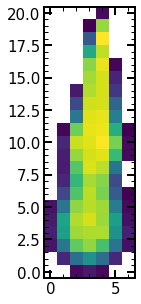

In [47]:
figure , axs = plt.subplots(1,1,figsize=[5,5])
axs.imshow(matrix_ext_1_vertical[179]) # 4, 7, 10 
plt.show()

In [54]:
list_index_long_muons = []

for index in np.arange(0, len(matrix_ext_1_vertical)):
    size_x = matrix_ext_1_vertical[index].shape[1]
    size_y = matrix_ext_1_vertical[index].shape[0]
    if size_y > 30:
        # print(size_x, size_y)
        list_index_long_muons.append(index)

# print(list_index_long_muons)+
print('Muones largos detectados: ', len(list_index_long_muons))
print('Indices: ', list_index_long_muons)

Muones largos detectados:  185
Indices:  [3, 13, 14, 53, 87, 91, 95, 131, 215, 218, 231, 260, 293, 326, 330, 356, 358, 361, 450, 462, 464, 480, 508, 516, 517, 521, 536, 546, 556, 557, 564, 576, 596, 666, 686, 691, 695, 700, 751, 757, 774, 788, 852, 862, 909, 925, 977, 981, 989, 1053, 1055, 1061, 1085, 1127, 1152, 1160, 1166, 1206, 1223, 1225, 1231, 1235, 1240, 1257, 1277, 1283, 1285, 1345, 1444, 1452, 1455, 1468, 1541, 1569, 1580, 1610, 1660, 1721, 1740, 1751, 1766, 1823, 1841, 1850, 1852, 1858, 1881, 1899, 1920, 1977, 2022, 2031, 2062, 2071, 2093, 2100, 2144, 2148, 2153, 2212, 2223, 2247, 2252, 2258, 2262, 2264, 2271, 2272, 2316, 2334, 2346, 2370, 2397, 2419, 2433, 2435, 2458, 2464, 2465, 2482, 2530, 2590, 2591, 2593, 2606, 2609, 2627, 2633, 2634, 2657, 2663, 2697, 2726, 2769, 2821, 2866, 2877, 2904, 2916, 2958, 2972, 3006, 3038, 3047, 3080, 3089, 3093, 3121, 3159, 3162, 3217, 3224, 3225, 3227, 3262, 3286, 3313, 3326, 3374, 3388, 3427, 3443, 3444, 3448, 3470, 3487, 3493, 3505, 3506, 3

## Perfil Energético

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


15763509.0


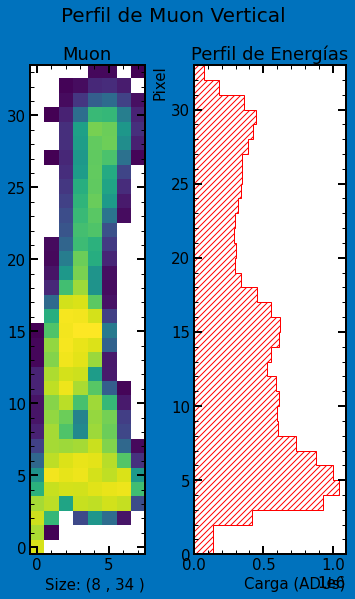

In [186]:
num = 79

fig, axs = plt.subplots(ncols=2, nrows=1, figsize = [6,9], facecolor = [0, 0.4470, 0.7410])
fig.suptitle('Perfil de Muon Vertical', y = 0.97, size = 20)

for event in matrix_ext_1_vertical[num:num + 1]:
    # plt.imshow(event)
    size_x = event.shape[1]
    size_y = event.shape[0]
    print(event.sum())

    label_verticalMuon, nlabels_verticalMuon = ndimage.label(event,structure=[[0,0,0],[1,1,1],[0,0,0]])

    charge_verticalMuon = []
    for lable_line in range(1, nlabels_verticalMuon):
        line = label_verticalMuon == lable_line
        loc = ndimage.find_objects(label_verticalMuon == lable_line)[0]
        mask_35 = np.invert(label_verticalMuon == lable_line)
        data_mask = ma.masked_array(event[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop], mask_35[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop])
        charge = data_mask.sum()
        mean_charge = data_mask.mean()

        charge_verticalMuon.append(charge)
        # print(charge)

    x0 = axs[0].imshow(event)
    axs[0].set_title('Muon')
    axs[0].set_xlabel('Size: (' + str(size_x) + ' , ' + str(size_y) + ' )')
    # x0bar = fig.colorbar(x0, ax=axs[0])

    axs[1].stairs(charge_verticalMuon, np.arange(0,len(charge_verticalMuon)+1),  orientation='horizontal', hatch = '////', color = 'r')
    # axs[1].vlines(x = mean_charge, ymin = 0, ymax = len(event) - 1, color = 'k', label = 'Mean Charge \n' + str(mean_charge))
    axs[1].set_xlabel('Carga (ADUs)')
    axs[1].set_ylabel('Pixel')
    axs[1].set_ylim(0,len(event) - 1 )
    axs[1].set_title('Perfil de Energías')
    axs[1].legend()
    plt.show()

# Modelo de Difusión

## Ajuste de Gaussiana por linea

Centroide:  1.0183237143918653  Amplitud:  150795.81657403958 sigma:  1.2667642613600791


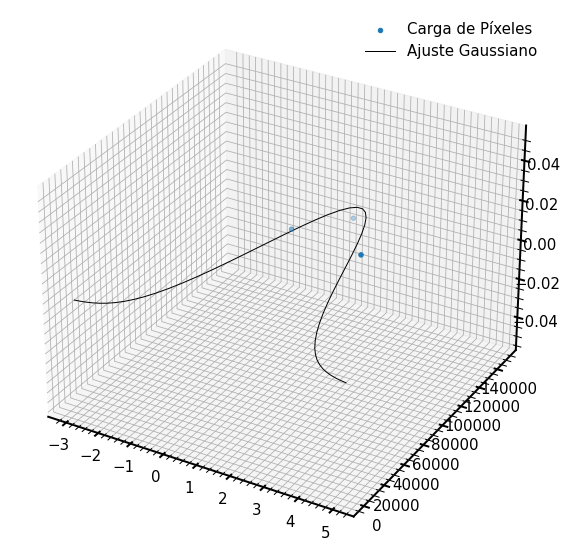

In [61]:
lable_line = 3
event = matrix_ext_1_vertical[179]

# plt.imshow(event)
size_x = event.shape[1]
size_y = event.shape[0]

label_verticalMuon, nlabels_verticalMuon = ndimage.label(event,structure=[[0,0,0],[1,1,1],[0,0,0]])

# plt.imshow(label_verticalMuon == 13)
# plt.colorbar()
# plt.show()

# print(nlabels_verticalMuon)
line = label_verticalMuon == lable_line
loc = ndimage.find_objects(label_verticalMuon == lable_line)[0]
mask_35 = np.invert(label_verticalMuon == lable_line)
data_mask = ma.masked_array(event[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop], mask_35[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop])
# print(data_mask[0])
Longitud_linea = len(data_mask[0])


# fig_all, axs_all = plt.subplots(1, 1, figsize=(10, 10))
fig, axs_all = plt.subplots(subplot_kw={"projection": "3d"}, figsize = [10,10])


# Bins = len(data_mask[0]) + 20
Bins = 50


# list_xlabel = []
# for index in np.arange(0, len(data_mask[0])):
#     list_xlabel.append(index)

list_xlabel = np.linspace(0, len(data_mask[0]), len(data_mask[0]))

list_xlabel_long = np.linspace(-Longitud_linea + int(Longitud_linea/2) , Longitud_linea + int(Longitud_linea/2))
# for index in np.arange(-3, 10):
#     list_xlabel_long.append(index)

axs_all.scatter(list_xlabel, data_mask[0], 0, 'o', label = 'Carga de Píxeles')
popt, pcov = curve_fit(gaussian, list_xlabel, data_mask[0], maxfev=100000)#, p0 = [1,1,1])		# Fit histogram with gaussian

dict_popt = {'Mean' : popt[1], 'Hight' : popt[0], 'sigma' : abs(popt[2]), 'Pcov' : pcov}

Centroide = popt[1]
list_xlabel_long = np.linspace( Centroide - 4 , Centroide + 4)
axs_all.plot(list_xlabel_long, gaussian(list_xlabel_long, *popt), 0, 'k', label = 'Ajuste Gaussiano')	
axs_all.legend()

print('Centroide: ',popt[1], ' Amplitud: ', popt[0], 'sigma: ', abs(popt[2]))  #gaussian(x, a, mean, sigma)


# for lable_line in range(1, nlabels_verticalMuon):
#     line = label_verticalMuon == lable_line
#     loc = ndimage.find_objects(label_verticalMuon == lable_line)[0]
#     mask_35 = np.invert(label_verticalMuon == lable_line)
#     data_mask = ma.masked_array(event[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop], mask_35[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop])
#     # plt.imshow(data_mask)
#     print(data_mask.mask)
#     # charge = data_mask.sum()
    # mean_charge = data_mask.mean()


## Todas las gaussianas de un muon

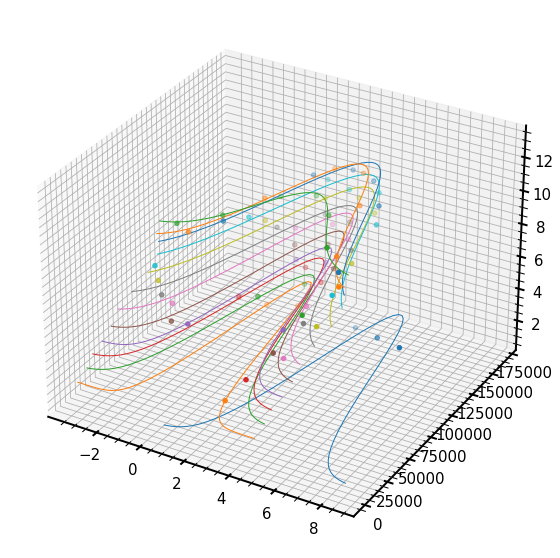

In [65]:
event = matrix_ext_1_vertical[179]

# plt.imshow(event)
size_x = event.shape[1]
size_y = event.shape[0]

label_verticalMuon, nlabels_verticalMuon = ndimage.label(event,structure=[[0,0,0],[1,1,1],[0,0,0]])

# plt.imshow(label_verticalMuon == 13)
# plt.colorbar()
# plt.show()

list_sigmas = []

# fig_all, axs_all = plt.subplots(1, 2, figsize=(12, 6))
fig, axs_all = plt.subplots( subplot_kw={"projection": "3d"}, figsize = [10,10])

for lable_line in np.arange(1, nlabels_verticalMuon):

    ## Enmascara la linea en turno
    # print(nlabels_verticalMuon)
    line = label_verticalMuon == lable_line
    loc = ndimage.find_objects(label_verticalMuon == lable_line)[0]
    mask_35 = np.invert(label_verticalMuon == lable_line)
    data_mask = ma.masked_array(event[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop], mask_35[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop])
    # print(data_mask[0])

    ## Se obtiene su longitud ##
    Longitud_linea = len(data_mask[0])

    ##Se crea un arreglo para usarlo en el plot de los datos, y se realiza el juste ##
    list_xlabel_long = np.linspace(-Longitud_linea + int(Longitud_linea/2) , Longitud_linea + int(Longitud_linea/2))
    popt, pcov = curve_fit(gaussian, list_xlabel, data_mask[0], maxfev=100000)#, p0 = [1,1,1])		# Fit histogram with gaussian

    dict_popt = {'Mean' : popt[1], 'Hight' : popt[0], 'sigma' : abs(popt[2]), 'Pcov' : pcov}
    Centroide = popt[1]
    Sigma = abs(popt[2])

    ## Se grafican los puntos experimentales ##
    axs_all.scatter(list_xlabel, data_mask[0], lable_line, 'o')

    ## Se crea otro arreglo para el plot del ajusto y se dibuja ##
    list_xlabel_long = np.linspace( Centroide - 4 , Centroide + 4)
    axs_all.plot(list_xlabel_long, gaussian(list_xlabel_long, *popt), lable_line)	
    # axs_all.legend()

    # Se guarda la sigma de la distribución en una lista ##
    list_sigmas.append(Sigma)
    # print('Centroide: ',popt[1], ' Amplitud: ', popt[0], 'sigma: ', abs(popt[2]))  #gaussian(x, a, mean, sigma)

# list_xlabel_sigmas = np.linspace(0, len(list_sigmas), len(list_sigmas))
# axs_all[1].scatter(list_xlabel_sigmas, list_sigmas)
plt.show()

# for lable_line in range(1, nlabels_verticalMuon):
#     line = label_verticalMuon == lable_line
#     loc = ndimage.find_objects(label_verticalMuon == lable_line)[0]
#     mask_35 = np.invert(label_verticalMuon == lable_line)
#     data_mask = ma.masked_array(event[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop], mask_35[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop])
#     # plt.imshow(data_mask)
#     print(data_mask.mask)
#     # charge = data_mask.sum()
    # mean_charge = data_mask.mean()


# Visualizar Muones en PDF

In [13]:
sample_horizontal = []
for index in np.arange(0, int(len(matrix_ext_4_horizontal))):
    sample_horizontal.append(matrix_ext_4_horizontal[index])

In [15]:
# c = canvas.Canvas("Muones-Verticales.pdf")
c = canvas.Canvas("Muones-Horizontales_Elip0.9_Sol_0.7.pdf")
# c = canvas.Canvas("Muones_Rectos.pdf")

path_image = 'Perfil_Muon.jpg'

# list_n_vertical = []
# list_n_events = []

n_events = 0
coord3x3 = [[0,0],[0,1], [0,2], [1,0], [1,1], [1,2], [2,0], [2,1], [2,2]]
fig, axs = plt.subplots(ncols= 3, nrows= 3, figsize = [10,10], facecolor = [0, 0.4470, 0.7410]) ## Las hojas tendrán 9 muones
w, h = A4 ## dimensiones del formato
num_pages = 0
c.showPage()
n_last_events = 0

# for extension in (1,2,4):
extension = 4
c.drawString(50, h - 50, 'Extensión ' + str(extension)) 
# n_vertical = len(dict_muons_true['extension_' +str(extension)]['Vertical_Events'])
n_vertical = len(sample_horizontal)
# n_vertical = len(data_histogram['extension_' + str(extension)]['Horizontal_Events']) + len(data_histogram['extension_' + str(extension)]['Vertical_Events'])
n_last_events = 0
n_events = 0
# print(n_vertical % 9 != 0)

if (n_vertical%9) == 0:
    # for event in dict_muons_true['extension_' +str(extension)]['Vertical_Events']:
    for event in sample_horizontal:
        n_vertical = n_vertical - 1
        n_events = n_events + 1
        # list_n_vertical.append(n_vertical)
        # list_n_events.append(n_events)
        # print('n_events: ', n_events)
        # print('n_vertical: ', n_vertical)

        # print('n_vertical: ', n_vertical)
        if n_events < 10: 
            # print('n_events: ', n_events)
            charge = event.sum()
            axs[coord3x3[n_events - 1][0],coord3x3[n_events - 1][1]].imshow(event)
            axs[coord3x3[n_events - 1][0],coord3x3[n_events - 1][1]].set_xlabel('Charge: ' + str(charge))

            if n_events == 9:
                n_events = 10

        if n_events == 10:
            n_events = 0
            num_pages = num_pages + 1
            fig.savefig(path_image)
            img = ImageReader(path_image)

            # Obtener el ancho y alto de la imagen.
            img_w, img_h = img.getSize()

            # h - img_h es el alto de la hoja menos el alto de la imagen.
            c.drawImage(img, w - img_w + 50, h - img_h - 60)
            c.drawString(w/2, 40, str(num_pages) + '.a')
            c.showPage()
            # plt.imshow(event)
            # plt.show()
            plt.close()
            ! rm Perfil_Muon.jpg

            fig, axs = plt.subplots(ncols= 3, nrows= 3, figsize = [10,10], facecolor = [0, 0.4470, 0.7410])

if (n_vertical%9) != 0:
    
    # for event in dict_muons_true['extension_' +str(extension)]['Vertical_Events']:
    for event in sample_horizontal:
        n_vertical = n_vertical - 1
        n_events = n_events + 1
        # list_n_vertical.append(n_vertical)
        # list_n_events.append(n_events)
        # print('n_events: ', n_events)
        # print('n_vertical: ', n_vertical)

        if n_vertical >= 6:
            # print('n_vertical: ', n_vertical)
            if n_events < 10: 
                # print('n_events: ', n_events)
                axs[coord3x3[n_events - 1][0],coord3x3[n_events - 1][1]].imshow(event)
                axs[coord3x3[n_events - 1][0],coord3x3[n_events - 1][1]].set_xlabel('Charge: ' + str(charge))
                if n_events == 9:
                    n_events = 10

            if n_events == 10:
                n_events = 0
                num_pages = num_pages + 1
                fig.savefig(path_image)
                img = ImageReader(path_image)

                # Obtener el ancho y alto de la imagen.
                img_w, img_h = img.getSize()

                # h - img_h es el alto de la hoja menos el alto de la imagen.
                c.drawImage(img, w - img_w + 50, h - img_h - 60)
                c.drawString(w/2, 40, str(num_pages) + '.a')
                c.showPage()
                # plt.imshow(event)
                # plt.show()
                plt.close()
                ! rm Perfil_Muon.jpg

                fig, axs = plt.subplots(ncols= 3, nrows= 3, figsize = [10,10], facecolor = [0, 0.4470, 0.7410])

        if  n_vertical < 6:
            n_last_events = n_last_events + 1
            # fig, axs = plt.subplots(ncols= 3, nrows= 3, figsize = [10,10], facecolor = [0, 0.4470, 0.7410])
            # print('n_vertical: ', n_vertical)
            # print('n_last_events: ', n_last_events)
            axs[coord3x3[n_last_events - 1][0],coord3x3[n_last_events - 1][1]].imshow(event)
            axs[coord3x3[n_last_events - 1][0],coord3x3[n_last_events - 1][1]].set_xlabel('Charge: ' + str(charge))

            if n_vertical == 0:
                # plt.show()
                num_pages = num_pages + 1
                fig.savefig(path_image)
                img = ImageReader(path_image)

                # Obtener el ancho y alto de la imagen.
                img_w, img_h = img.getSize()

                # h - img_h es el alto de la hoja menos el alto de la imagen.
                c.drawImage(img, w - img_w + 50, h - img_h - 60)
                c.drawString(w/2, 40, str(num_pages) + '.a')
                c.showPage()
                # plt.imshow(event)
                # plt.show()
                plt.close()
                ! rm Perfil_Muon.jpg




plt.close()
c.save()